<center>
btw Vclass udah mulai numpuk, mending pake bot buat ingetin tugas
<br>
<h3><a src=/>invite link</a></h3>
</center>






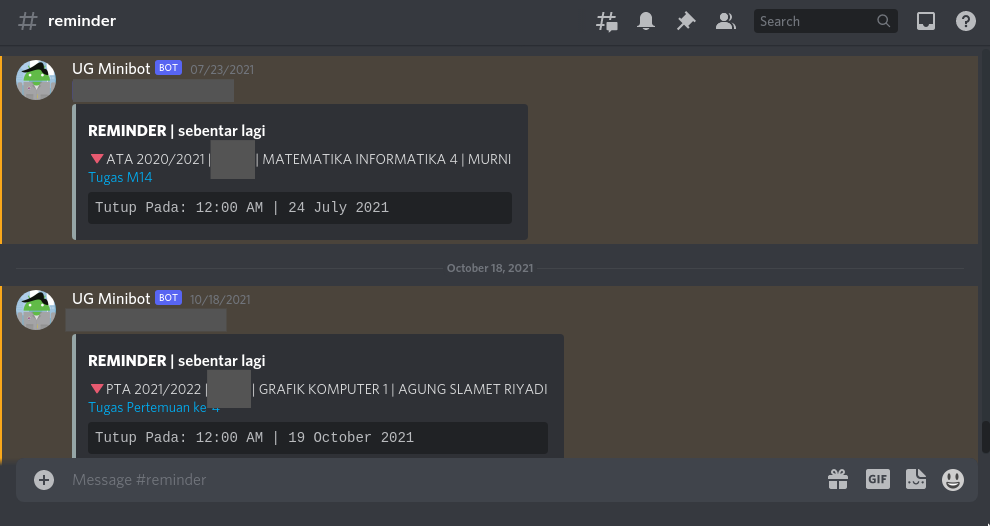

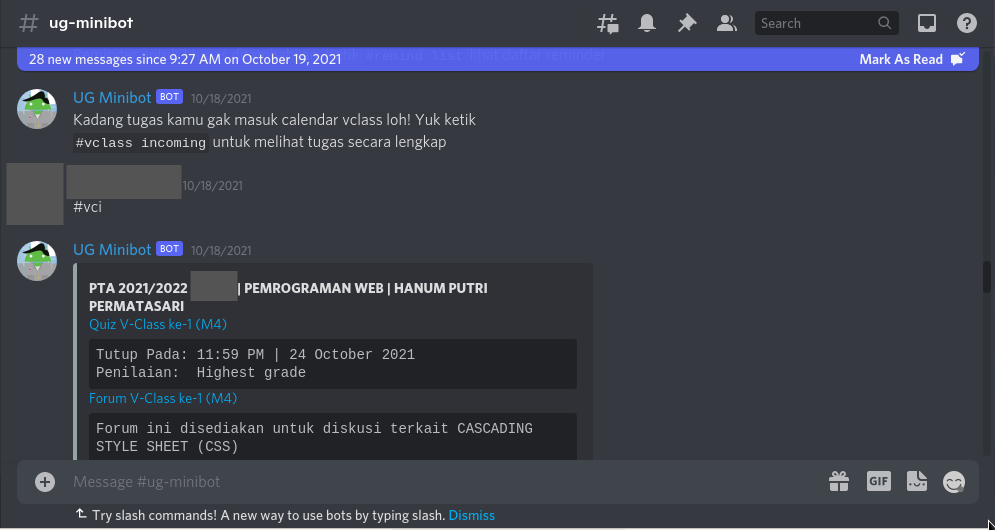

### Overview Dataset

"Data Komponen Beton".

Data set ini berisikan beberapa kategori sebagai berikut
* cement (kg)
* slag (blast furnace slag, kg)
* ash (fly ash, kg)
* water (kg)
* superplastic (superplasticizer, kg)
* coarseagg (coarse aggregate, kg)
* fineagg (fine aggregate, kg)
* age (days, 1-365)
* strength (Concrete compressive strength, MPa)

# Exploratory Data Analysis (EDA)


# Instruksi Tugas Praktikum FIKTI dan FTI

1. Buat univariate dan bivariate analysis untuk data set di atas
2. Jelaskan kesimpulan yang bisa di ambil dari analysis yg anda lakukan




# 1. Pengambilan Data:

## 1.1 Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv")
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


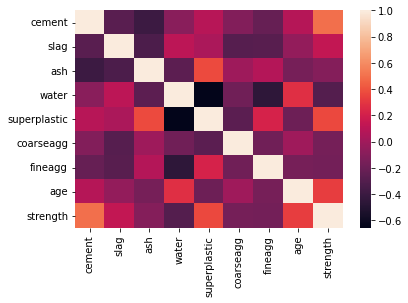

In [4]:
sns.heatmap(data.corr())

# 2. EDA

## 2.1.Univariate analysis


## 2.1.1 cement 

### **i.	Distribusi**

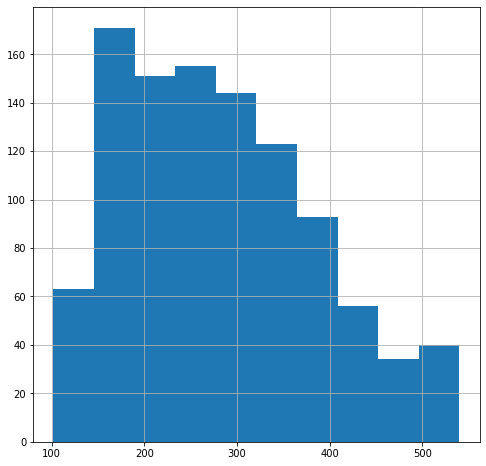

In [5]:
data['cement'].hist(figsize=(8,8))
plt.show()

### **ii.	Deskripsi**
Histogram di atas menjelaskan bahwa :
*  atribut "cement" tidak simetris.
*  miring ke kanan
*  berat minimum dan maksimum semen adalah 102 dan 540 kg.


# 2.2.Bivariate analysis

## 2.2.1 cement - strength

### i. **Boxplot**

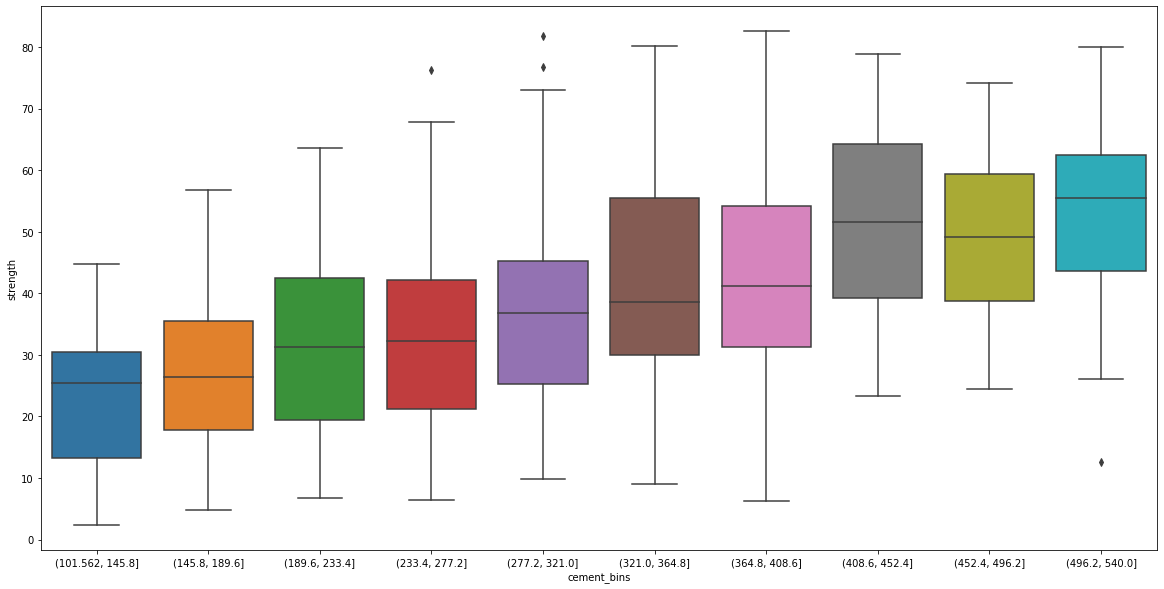

In [6]:
data['cement_bins'] = pd.cut(data['cement'], bins=10)
fig = plt.figure(figsize=(20,10)) 
sns.boxplot(x="cement_bins", y="strength", data=data)
plt.show()


### ii. Deskripsi

### ii. Deskripsi
Bivariate boxplot di atas menjelaskan bahwa :
* Semakin banyak semen yang digunakan, metriks strength akan semakin tinggi 
* Strength paling kecil pada penggunaan semen 100 kg hingga 145 kg

### iii. Uji Hipotesis
**Two sampled T-test** :-Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.


Tentukan null dan alternate hypothesis.

    Secara umum, null hypothesis akan menyatakan bahwa kedua populasi yang diuji tidak memiliki perbedaan yang signifikan secara statistik.
    alternate hypothesis akan menyatakan bahwa ada perbedaan.

Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis :- tidak ada perbedaan Rerata usia kelompok pendapatan &gt;50k dan kelompok pendapatan &lt;=50k.
*  Alternate Hypothesis :- ada perbedaan Rerata usia kelompok pendapatan &gt;50k dan kelompok pendapatan &lt;=50k.

In [7]:
import random

cement_mean = data['cement'].mean()
data = data[(np.abs(stats.zscore(data["strength"])) < 3)] 

strength_1 = data[data['cement']<cement_mean]['age']
strength_0 = data[data['cement']>cement_mean]['age']

strength_0 = strength_0.values.tolist()
strength_0 = random.sample(strength_0, 100)
strength_1 = strength_1.values.tolist()
strength_1 = random.sample(strength_1, 100)


In [8]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(strength_1,strength_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("null hypothesis ditolak")
else:
    print("null hypothesis diterima")

ttest 0.24964222050416693
p value 0.8031237380799096
null hypothesis diterima


### iv. Kesimpulan akhir

Dapat disimpulkan bahwa terdapat perbedaan yang signifikan pada kelompok semen dengan berat di bawah rata-rata dan kelompok semen diatas rata-rata.
Hal Ini membuktikan bahwa berat semen yang digunakan memiliki peranan dalam kekuatan beton.